<center>
<a href="" ><img src="./logo.png" style="float:left; max-width: 200px; height: 145px; "/></a> 
</center>
<div id="report" style="text-align: center; padding: 10px; background-color:rgb(17, 16, 16); border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); ">
  <h1 style="font-size: 2.2em; font-family: 'Georgia', serif; color:rgb(247, 239, 248); margin-bottom: 10px;">
    Détection de Fraude par une Méthode à Deux Niveaux 
  </h1>
  <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color:rgb(227, 231, 235); margin: 5px 0;">
    Élaboré par :  
  </p>
  <div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 5px; justify-items: center; margin-bottom: 10px;">
  <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color:rgb(225, 233, 241); font-weight: bold;">
      &#9733; ZIAN Hafsa
    </p>
    <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color:rgb(225, 233, 241); font-weight: bold;">
      &#9733; HAYHAY Yasmine
    </p>
  </div>
  <div style="margin-top: 15px; padding: 5px; background-color: #ecf0f1; border-left: 4px solid rgb(127, 50, 129); border-radius: 8px; display: inline-block; max-width: 60%;">
    <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color:rgb(16, 17, 17); margin: 0; font-style: italic;">
      Supervisé par : 
      <span style="font-weight: bold; color:rgb(129, 27, 116);">Pr. ELHARCHILI Fidae</span>
    </p>
  </div>
</div> 

In [2]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
# Chargement des données
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Normalisation de la variable 'Amount'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [5]:
# Séparation des données
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [29]:
from sklearn.linear_model import LogisticRegression
# Niveau supérieur : Régression logistique
log_reg = LogisticRegression(solver='liblinear',max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [31]:
# Évaluation du niveau supérieur
print("Rapport de classification du niveau supérieur :")
print(classification_report(y_test, y_pred_log_reg))
print("Matrice de confusion du niveau supérieur :")
print(confusion_matrix(y_test, y_pred_log_reg))

Rapport de classification du niveau supérieur :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53698
           1       0.84      0.63      0.72        43

    accuracy                           1.00     53741
   macro avg       0.92      0.81      0.86     53741
weighted avg       1.00      1.00      1.00     53741

Matrice de confusion du niveau supérieur :
[[53693     5]
 [   16    27]]


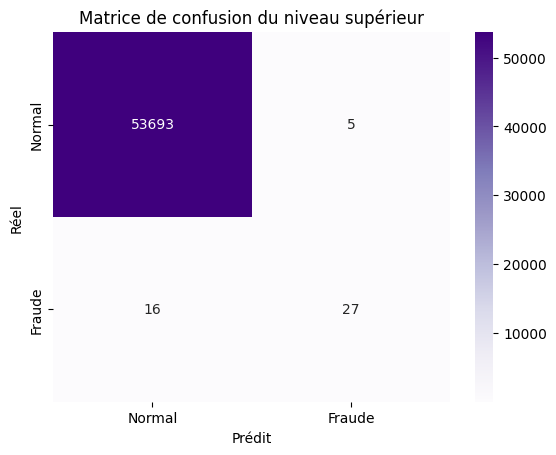

In [32]:
# Visualisation de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['Normal', 'Fraude'], yticklabels=['Normal', 'Fraude'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion du niveau supérieur')
plt.show()

In [33]:
# Niveau inférieur : KMeans sur les transactions suspectes
suspect_indices = np.where(y_pred_log_reg == 1)[0]  # Indices des transactions suspectes
X_suspect = X_test.iloc[suspect_indices]  # Transactions suspectes

In [34]:
# Clustering avec KMeans
kmeans = KMeans(n_clusters=2, random_state=42)  # 2 clusters : fraudes potentielles et non-fraudes
clusters = kmeans.fit_predict(X_suspect)

In [35]:
# Identification du cluster de fraudes
fraud_cluster = 1 if np.sum(y_test.iloc[suspect_indices][clusters == 1]) > np.sum(y_test.iloc[suspect_indices][clusters == 0]) else 0
fraud_indices = suspect_indices[clusters == fraud_cluster]

In [36]:
# Résultats du niveau inférieur
print("\nNombre de transactions suspectes détectées au niveau inférieur :", len(fraud_indices))


Nombre de transactions suspectes détectées au niveau inférieur : 30


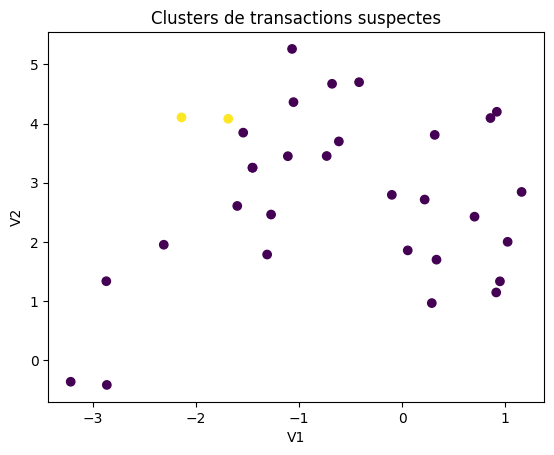

In [38]:
# Visualisation des clusters
plt.scatter(X_suspect.iloc[:, 0], X_suspect.iloc[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Clusters de transactions suspectes')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

In [39]:
# Analyse des clusters
X_suspect['Cluster'] = clusters
cluster_summary = X_suspect.groupby('Cluster').mean()
print("Résumé des clusters :")
print(cluster_summary)

Résumé des clusters :
               V1        V2        V3        V4        V5        V6        V7  \
Cluster                                                                         
0       -0.597411  2.706761 -4.583068  4.203522  0.176659 -1.852736 -1.952580   
1       -1.913733  4.093060 -8.383699  4.796815 -4.416481 -3.639242 -8.604351   

               V8        V9        V10  ...       V20       V21       V22  \
Cluster                                 ...                                 
0        0.722349 -2.107344  -4.057891  ...  0.358572  0.488613  0.038423   
1        1.835146 -3.648346 -12.450019  ...  1.512608  1.623704 -0.354571   

              V23       V24       V25       V26       V27       V28    Amount  
Cluster                                                                        
0       -0.120544 -0.352995 -0.069781  0.160953  0.408836  0.164253 -0.248266  
1       -0.328897  0.140393  1.271590 -0.362322  2.132150  1.040671 -0.349711  

[2 rows x 29 columns]


C:\Users\l\AppData\Local\Temp\ipykernel_23072\956592193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_suspect['Cluster'] = clusters


AUC-ROC : 0.9693414591682856


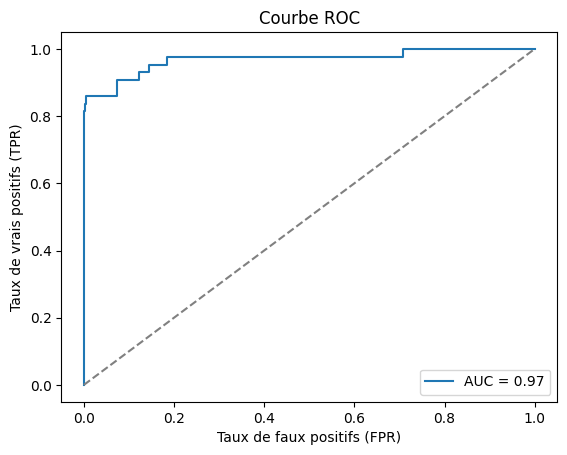

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# Courbe ROC pour la régression logistique
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC :", auc_roc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()